 # Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## loading the dataset

In [31]:
df = pd.read_csv('Downloads/2020_Yellow_Taxi_Trip_Data.csv', nrows = 200000)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
df.shape

(200000, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [32]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [7]:
df = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,0 days 00:04:48
1,1.0,1.2,1.0,7.0,0 days 00:07:25
2,1.0,0.6,1.0,6.0,0 days 00:06:11
3,1.0,0.8,1.0,5.5,0 days 00:04:51
4,1.0,0.0,2.0,3.5,0 days 00:02:18


In [8]:
df.isnull().sum()

passenger_count    344
trip_distance        0
payment_type       344
fare_amount          0
duration             0
dtype: int64

In [9]:
df.dropna(inplace = True)
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,0 days 00:04:48
1,1.0,1.20,1.0,7.0,0 days 00:07:25
2,1.0,0.60,1.0,6.0,0 days 00:06:11
3,1.0,0.80,1.0,5.5,0 days 00:04:51
4,1.0,0.00,2.0,3.5,0 days 00:02:18
...,...,...,...,...,...
199995,1.0,2.80,1.0,13.5,0 days 00:17:11
199996,2.0,2.60,1.0,11.5,0 days 00:12:50
199997,1.0,6.76,1.0,22.5,0 days 00:20:21
199998,1.0,0.80,1.0,5.0,0 days 00:04:05


In [10]:
df['duration'] = df['duration'].dt.total_seconds()/60
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
199995,1.0,2.80,1.0,13.5,17.183333
199996,2.0,2.60,1.0,11.5,12.833333
199997,1.0,6.76,1.0,22.5,20.350000
199998,1.0,0.80,1.0,5.0,4.083333


In [11]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [12]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2064,1,0.00,2,7.0,0.000000
2451,1,0.00,1,52.0,0.200000
2456,2,1.70,1,9.5,13.066667
2476,1,0.40,1,4.0,3.083333
3358,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
199969,1,1.01,1,5.5,4.400000
199973,1,1.00,1,6.0,4.783333
199985,1,1.00,1,5.5,4.383333
199994,1,1.00,1,7.0,7.983333


In [13]:
df['passenger_count'].value_counts(normalize = True)
df.head()
  

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [14]:
df['payment_type'].value_counts(normalize = True)  

payment_type
1    0.647849
2    0.342204
3    0.006100
4    0.003847
Name: proportion, dtype: float64

In [15]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]
df.head()


,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [16]:
df['payment_type'].replace([1,2],['card','cash'],inplace = True)
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,190162.000000,190162.000000,190162.000000,190162.000000
mean,1.568000,3.477666,13.867072,16.539849
std,1.022728,4.329098,13.528777,76.762665
min,1.000000,0.000000,-110.000000,0.000000
25%,1.000000,1.070000,6.500000,5.866667
50%,1.000000,1.890000,9.500000,9.900000
75%,2.000000,3.800000,15.500000,16.350000
max,5.000000,100.150000,400.000000,1439.600000


In [17]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,card,6.0,4.800000
1,1,1.20,card,7.0,7.416667
2,1,0.60,card,6.0,6.183333
3,1,0.80,card,5.5,4.850000
5,1,0.03,cash,2.5,0.883333


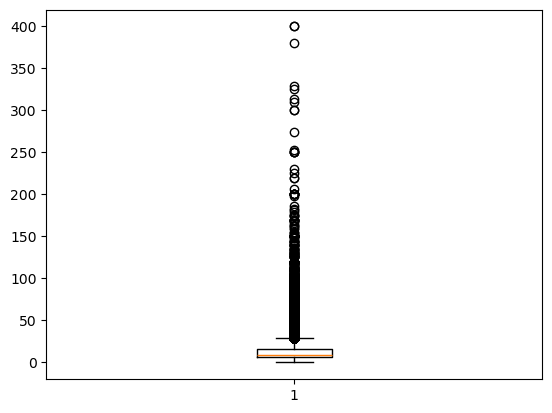

In [18]:
plt.boxplot(df['fare_amount'])
plt.show()

## Remove Outliers using IQR

In [19]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    LOWER_BOUND = q1 - 1.5 * IQR
    UPPER_BOUND = q3 + 1.5 * IQR

    df = df[(df[col] >= LOWER_BOUND) & (df[col] <= UPPER_BOUND)]




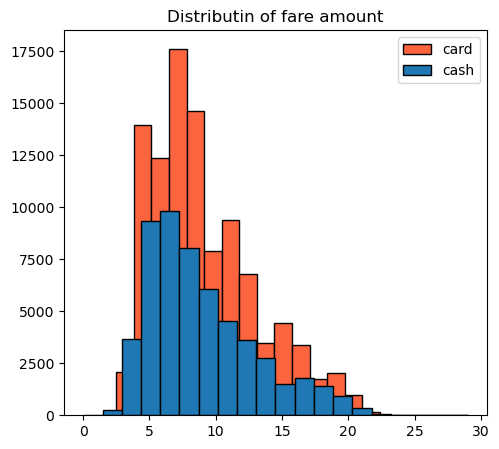

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Distributin of fare amount")
plt.hist(df[df['payment_type'] == 'card']['fare_amount'],histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FA643F', label = 'card')
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'],histtype = 'barstacked',bins = 20, edgecolor = 'k', label = 'cash')
plt.legend()
plt.show()


In [21]:
df.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card            9.082202  3.974242      1.977619  1.280031
cash            8.932055  4.068186      1.904646  1.332343

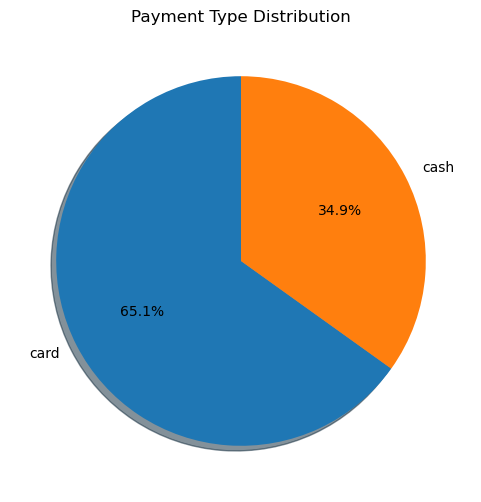

In [22]:
counts = df['payment_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts,
        labels=counts.index,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%')
plt.title("Payment Type Distribution")
plt.show()


In [23]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,69664,44.894119
1,card,2,19197,12.371274
2,card,3,5273,3.398121
3,card,4,2721,1.753515
4,card,5,4174,2.689884
5,cash,1,36073,23.246807
6,cash,2,10168,6.552644
7,cash,3,3384,2.180778
8,cash,4,2333,1.503474
9,cash,5,2187,1.409386


In [24]:
df_pivot = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df_pivot['payment_type'] = ['card','cash']
df_pivot.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df_pivot.iloc[1,1:] = passenger_count.iloc[5:,-1]
df_pivot

 

,payment_type,1,2,3,4,5
0,card,44.894119,12.371274,3.398121,1.753515,2.689884
1,cash,23.246807,6.552644,2.180778,1.503474,1.409386


## Add percentage

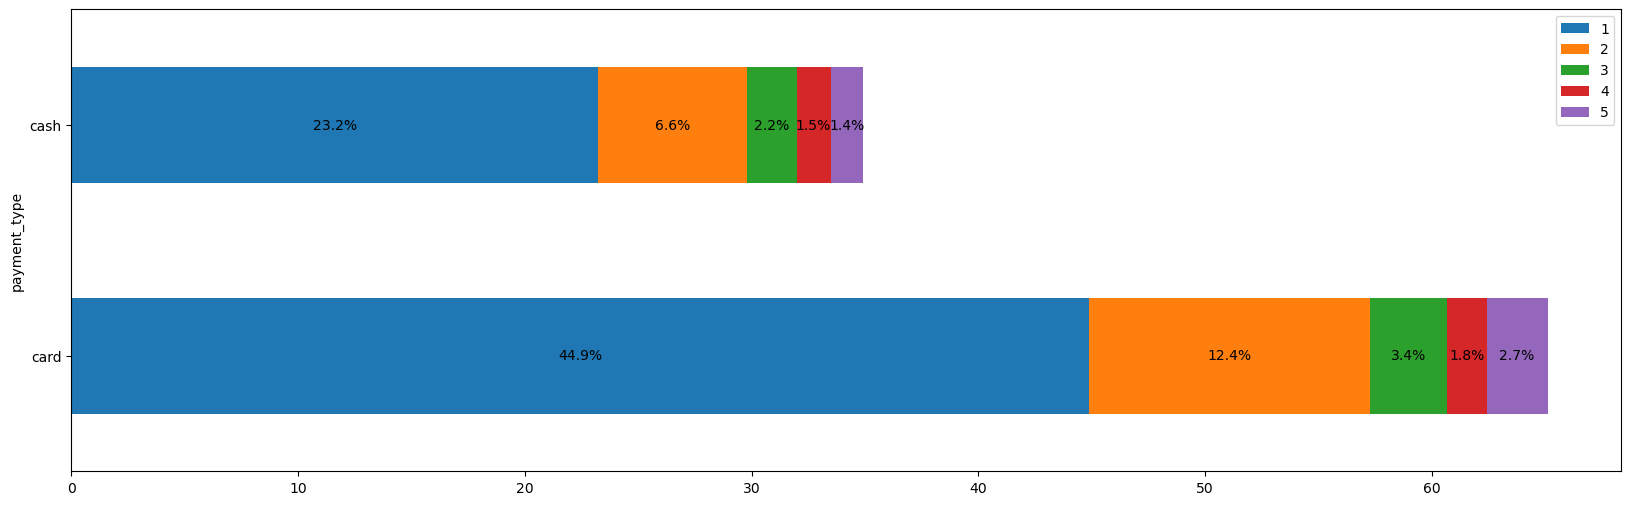

In [25]:
 fig, ax = plt.subplots(figsize=(20,6))

df_pivot.plot(
    x='payment_type',
    ax=ax,
    kind='barh',
    stacked=True
)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    ax.text(
        x + width/2,
        y + height/2,
        f'{width:.1f}%',          
        ha='center',
        va='center'
    )

plt.show()


 ### Hypothesis Testing

**Null hypothesis:**  
There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:**  
There is a difference in average fare between customers who use credit cards and customers who use cash.




 import statsmodels.api as sm

In [26]:
print(df.columns)
print(df['payment_type'].unique())
print(df['fare_amount'].head())
print(df['fare_amount'].describe())




Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'duration'],
      dtype='object')
['card' 'cash']
0    6.0
1    7.0
2    6.0
3    5.5
5    2.5
Name: fare_amount, dtype: float64
count    155174.000000
mean          9.029811
std           4.007898
min           0.010000
25%           6.000000
50%           8.000000
75%          11.500000
max          29.000000
Name: fare_amount, dtype: float64


In [27]:
import statsmodels.api as sm

In [28]:
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']

t_stats, p_value = st.ttest_ind(card_sample, cash_sample, equal_var=False)

print("T-statistic:", t_stats)
print("p-value:", p_value)




T-statistic: 6.985426003862178
p-value: 2.8561867684480994e-12
